<a href="https://colab.research.google.com/github/NarminAsadullayeva/2012-BPI-Challenge/blob/main/DataVisualisationFinancialLogcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto
import pm4py

In [ ]:
# Uplaod small source files
from google.colab import files
uploaded = files.upload()

Saving financial_log.csv to financial_log (1).csv


In [ ]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
log_csv = pd.read_csv('financial_log.csv', 
                      encoding='cp1252',sep=',')
log_csv = dataframe_utils.convert_timestamp_columns_in_df(log_csv)
def to_eventlog(dataset):
  # Convert log_csv to event_log
  parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:concept:name'} 
  # identify the case_id_key name (if not change it will simply be the nane of the coloumn)
  
  event_log = log_converter.apply(dataset, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
  return event_log

In [ ]:
log_csv

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,lifecycle:transition,concept:name,AMOUNT_REQ
0,173688,A_SUBMITTED-COMPLETE,112.0,38:44.5,Variant 1,1,COMPLETE,A_SUBMITTED,20000
1,173688,A_PARTLYSUBMITTED-COMPLETE,112.0,38:44.9,Variant 1,1,COMPLETE,A_PARTLYSUBMITTED,20000
2,173688,A_PREACCEPTED-COMPLETE,112.0,39:37.9,Variant 1,1,COMPLETE,A_PREACCEPTED,20000
3,173688,W_Completeren aanvraag-SCHEDULE,112.0,39:38.9,Variant 1,1,SCHEDULE,W_Completeren aanvraag,20000
4,173688,W_Completeren aanvraag-START,NaN,36:46.4,Variant 1,1,START,W_Completeren aanvraag,20000
...,...,...,...,...,...,...,...,...,...
119,173694,A_APPROVED-COMPLETE,10609.0,04:52.6,Variant 3,3,COMPLETE,A_APPROVED,7000
120,173694,A_REGISTERED-COMPLETE,10609.0,04:52.6,Variant 3,3,COMPLETE,A_REGISTERED,7000
121,173694,A_ACTIVATED-COMPLETE,10609.0,04:52.6,Variant 3,3,COMPLETE,A_ACTIVATED,7000
122,173694,W_Valideren aanvraag-COMPLETE,10609.0,05:01.5,Variant 3,3,COMPLETE,W_Valideren aanvraag,7000


In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
    

def count_occurences(column: str, dataset): 
        """
        count occurences of columns to picture them in a donut chart
        return: counted occurences of column values
        """
        count_column = dataset.groupby(column).count()
        return count_column

def group_lower_ranking_values(column, dataset):  
        '''
        group smallest counts to get a higher visibility
        return: dataset filtered by rating 
        '''
        rating_counts = dataset.groupby(column).count()
         # 75 quantile 
        pct_value = rating_counts[lambda x: x.columns[0]].quantile(.75) 
                                 
        values_below_pct_value = rating_counts[lambda x: 
                                               x.columns[0]].loc[lambda s: 
                                                                 s < pct_value].index.values
                                                                 
        def fix_values(row):
            if row[column] in values_below_pct_value: 
              row[column] = 'Other'
            return row

        rating_grouped = log_csv.apply(fix_values, axis=1).groupby(column).count()
        return rating_grouped



def pie_chart(column: str, dataset):

        count_column = count_occurences(column, dataset)
        #count_column = group_lower_ranking_values(column, dataset)

        type_labels = count_column['concept:name'].sort_values(ascending=False).index
        type_counts = count_column['concept:name'].sort_values(ascending=False)
        total = sum(type_counts)

        plt.figure(1, figsize=(15, 15))  # size
        the_grid = GridSpec(2, 2)
        #cmap = plt.get_cmap('tab20c')
        #reversed_cmap = cmap.reversed()
        colors = sns.color_palette('muted')[0:len(type_counts)]
        #colors = [reversed_cmap(i) for i in np.linspace(0, 1, 8)]
        plt.subplot(the_grid[0, 0], aspect=1)
        type_spend_areas = plt.pie(type_counts, shadow=True, colors=colors, 
                                   wedgeprops= { 'linewidth' : 1, 'edgecolor' : 'white' })
        plt.legend(bbox_to_anchor=(1, 1),frameon=False, loc='upper left', 
                   labels=["%s: %1.2f%%" % (i, (float(p)/total)*100) for i, p in 
                           zip(type_labels, type_counts)])

        plt.show()

In [ ]:
def donut_pie(column: str, dataset):
        count_column = count_occurences(column, dataset)
        #count_column = group_lower_ranking_values(column, dataset)
        
        type_labels = count_column['concept:name'].sort_values(ascending=False).index
        type_counts = count_column['concept:name'].sort_values(ascending=False)
        total = sum(type_counts)

        #print(type_counts)

        plt.figure(1, figsize=(5, 5))  # size
      
        the_grid = GridSpec(2, 2)

        #cmap = plt.get_cmap('tab20c')
        #reversed_cmap = cmap.reversed()
        colors = sns.color_palette('muted')[0:len(type_counts)]
        # colors = [reversed_cmap(i) for i in np.linspace(0, 1, 8)]

        # Create a circle at the center of the plot
        my_circle = plt.Circle( (0,0), 0.7, color='white')

        # Give color names
        plt.pie(type_counts, shadow=True, colors=colors, wedgeprops= { 'linewidth' : 1, 
                                                                      'edgecolor' : 'white' })
        plt.legend(frameon=False, bbox_to_anchor=(1,1), 
                   loc='upper left', labels=["%s: %1.2f%%" % (i, (float(p)/total)*100) 
                   for i, p in zip(type_labels, type_counts)])
        p = plt.gcf()
        p.gca().add_artist(my_circle)

        plt.show()

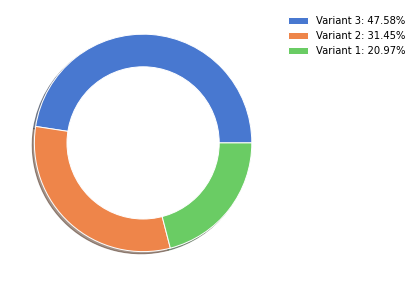

In [ ]:
donut_pie('Variant', log_csv)

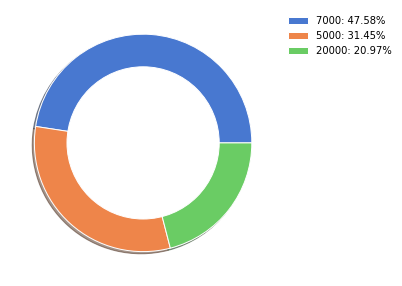

In [ ]:
donut_pie('AMOUNT_REQ', log_csv)

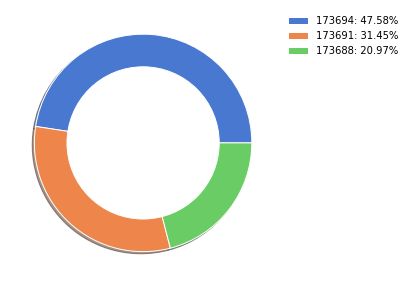

In [ ]:
donut_pie('Case ID', log_csv)

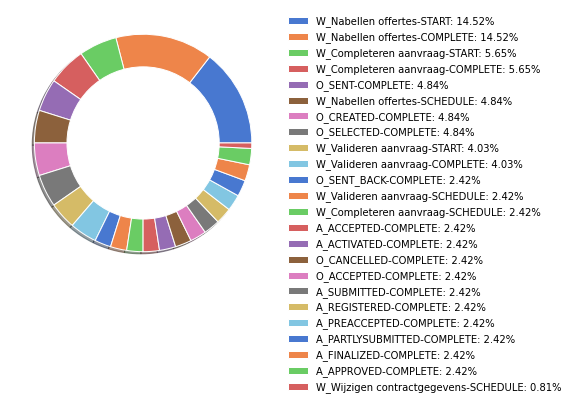

In [ ]:
donut_pie('Activity', log_csv)

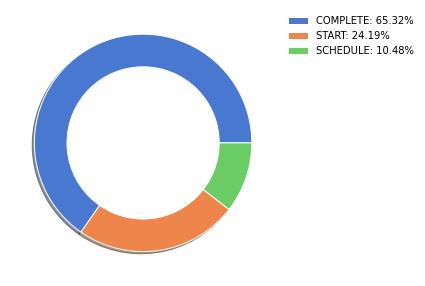

In [ ]:
donut_pie('lifecycle:transition', log_csv)